<a href="https://colab.research.google.com/github/21-sharp/Extion-internship-/blob/main/DATA%20SCIENCE%20PROJECTS%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulated Data:
   engine_id  time_in_cycles  sensor_1  sensor_2  sensor_3  sensor_4  \
0         52              34  0.181438  0.753428  0.673994  0.081575   
1         93             111  0.525163  0.768923  0.062565  0.087788   
2         15             264  0.709046  0.658541  0.210507  0.171829   
3         72             236  0.106877  0.766116  0.809024  0.518077   
4         61              83  0.567312  0.845921  0.146922  0.213995   

   sensor_5  sensor_6  sensor_7  sensor_8  ...  sensor_13  sensor_14  \
0  0.528189  0.459942  0.404654  0.470762  ...   0.834256   0.867404   
1  0.467261  0.606973  0.393682  0.878115  ...   0.304182   0.327100   
2  0.106712  0.188500  0.191873  0.585852  ...   0.469014   0.329063   
3  0.649556  0.804967  0.061217  0.674192  ...   0.873820   0.598194   
4  0.868000  0.967328  0.590916  0.804261  ...   0.052673   0.183563   

   sensor_15  sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  \
0   0.534818   0.613286   0.948364   0.292906  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 13423.5156 - val_loss: 13837.0156
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13200.1123 - val_loss: 13806.7422
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13109.0137 - val_loss: 13740.7266
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13134.9404 - val_loss: 13593.9404
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13085.1758 - val_loss: 13308.7832
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12401.6025 - val_loss: 12868.5869
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12061.7090 - val_loss: 12331.9355
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11463.2715 - val_loss: 11787.7119
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10993.0664 - val_loss: 11295.2363
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10614.4922 - val_loss: 10883.4248
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10622.6328 - val_loss: 10538.1

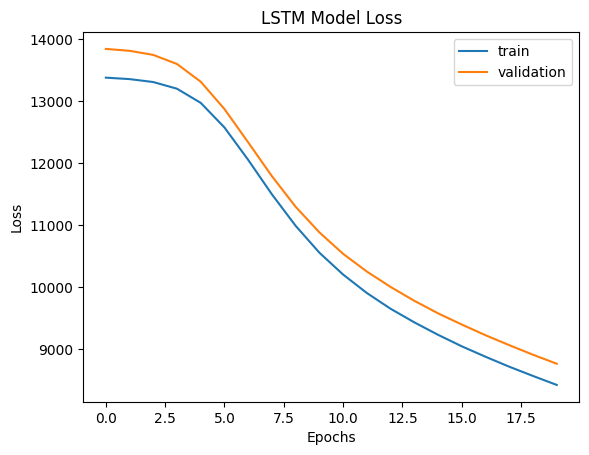

In [7]:
# 1. Predictive Maintenance in Manufacturing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Simulating random data resembling the NASA dataset structure
np.random.seed(42)

# Columns resembling sensor data + engine ID + time cycles
columns = ['engine_id', 'time_in_cycles'] + [f'sensor_{i}' for i in range(1, 22)] + ['RUL']

# Simulate 1000 data points with 20 sensor readings
data = {
    'engine_id': np.random.randint(1, 101, 1000),
    'time_in_cycles': np.random.randint(1, 300, 1000),
}

# Add sensor data columns (20 sensors)
for i in range(1, 22):
    data[f'sensor_{i}'] = np.random.uniform(low=0.0, high=1.0, size=1000)

# Remaining Useful Life (RUL) prediction (target)
data['RUL'] = np.random.randint(1, 200, 1000)

# Creating DataFrame
df = pd.DataFrame(data, columns=columns)
print("Simulated Data:")
print(df.head())

# Splitting the dataset
X = df.drop(['engine_id', 'RUL'], axis=1)  # Features (excluding engine ID and target RUL)
y = df['RUL']  # Target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Model 1: Random Forest for failure prediction ---

# Random Forest Regressor
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Prediction
y_pred_rf = rf.predict(X_test_scaled)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# --- Model 2: LSTM for time-series failure prediction ---

# Reshaping data for LSTM [samples, timesteps, features]
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
model.add(LSTM(50))
model.add(Dense(1))  # Output layer for RUL prediction

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the LSTM model
history = model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Predicting RUL with LSTM
y_pred_lstm = model.predict(X_test_lstm)

# Plotting the loss curve for LSTM
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




# New Section

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.41      0.44        96
           1       0.52      0.59      0.55       104

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.50      0.50       200



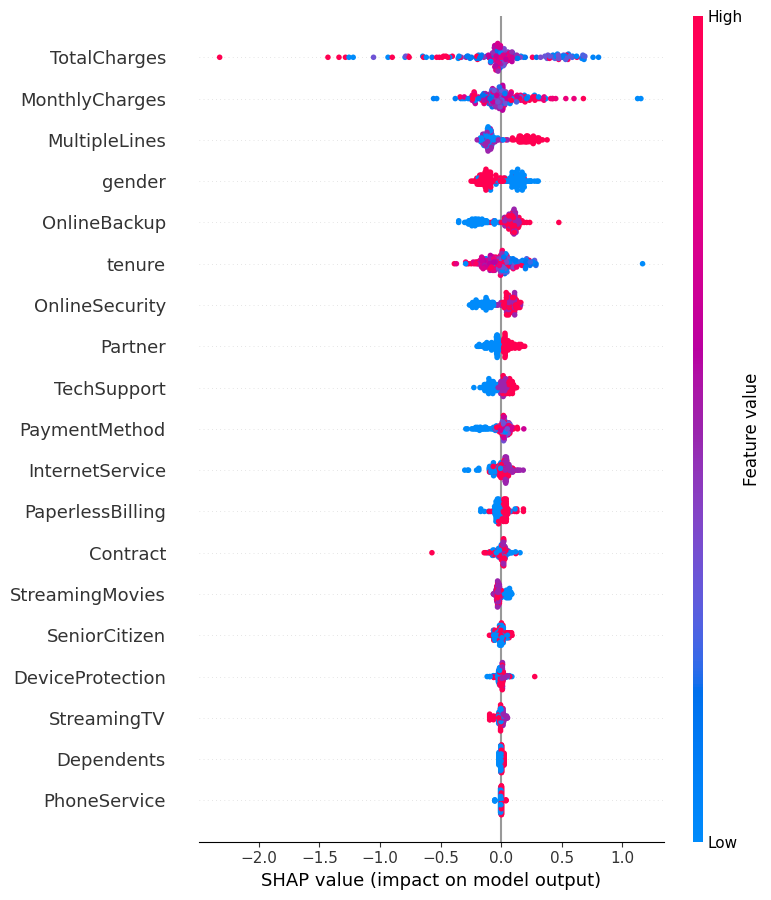

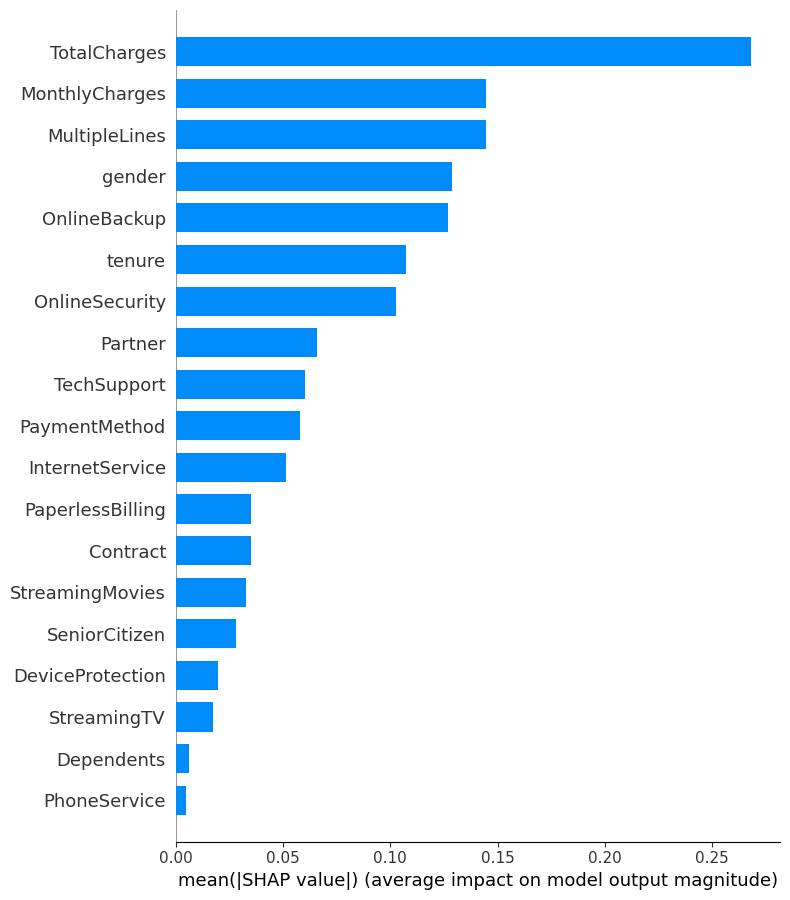

In [8]:
# 2. Customer Churn Prediction
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import shap
import matplotlib.pyplot as plt

# Simulated data for demonstration (replace with actual dataset path)
df = pd.DataFrame({
    'customerID': [f'C{i}' for i in range(1000)],
    'gender': np.random.choice(['Male', 'Female'], 1000),
    'SeniorCitizen': np.random.choice([0, 1], 1000),
    'Partner': np.random.choice(['Yes', 'No'], 1000),
    'Dependents': np.random.choice(['Yes', 'No'], 1000),
    'tenure': np.random.randint(1, 72, 1000),
    'PhoneService': np.random.choice(['Yes', 'No'], 1000),
    'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], 1000),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], 1000),
    'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
    'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
    'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
    'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
    'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
    'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], 1000),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], 1000),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], 1000),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], 1000),
    'MonthlyCharges': np.random.uniform(20.0, 120.0, 1000),
    'TotalCharges': np.random.uniform(20.0, 8000.0, 1000),
    'Churn': np.random.choice(['Yes', 'No'], 1000)
})

# Step 2: Preprocessing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
              'PaymentMethod', 'Churn']

# Label encoding
label_enc = LabelEncoder()
for col in label_cols:
    df[col] = label_enc.fit_transform(df[col])

scaler = StandardScaler()
df[['MonthlyCharges', 'TotalCharges', 'tenure']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges', 'tenure']])

X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Training Models
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Step 4: SHAP for Model Interpretation
explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(X_test)

# Corrected SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Feature importance plot (no need to index shap_values)
shap.summary_plot(shap_values, X_test, plot_type="bar")


Simulated Dataset Head:
         V1        V2        V3      Amount  Class
0  0.496714 -0.678495  0.348286  207.967154      0
1 -0.138264 -0.305499  0.283324  220.410939      0
2  0.647689 -0.597381 -0.936520  108.312606      0
3  1.523030  0.110418  0.579584   93.672005      0
4 -0.234153  1.197179 -1.490083  153.174737      0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 1.1622 - val_loss: 0.9612
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9173 - val_loss: 0.8810
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8544 - val_loss: 0.8148
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8107 - val_loss: 0.7966
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7994 - val_loss: 0.7811
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7801 - val_loss: 0.7664
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7657 - val_loss: 0.7498
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7584 - val_loss: 0.7345
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7347 - val_loss: 0.7222
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7364 - val_loss: 0.7107
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7072 - val_loss: 0.7024
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
--- Isolation Forest ---
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC-ROC: 0.4982
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1990
           1       0.00      0.00      0.00        10

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000



--- One-Class SVM ---
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC-ROC: 0.4756
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1990
           1       0.00      0.00      0.00        10

    accuracy                           0.95      2000
   macro avg       0.50      0.48      0.49      2000
weighted avg       0.99      0.95      0.97      2000



--- Autoencoder ---
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC-ROC: 0.4749
              precision    recall  f1-

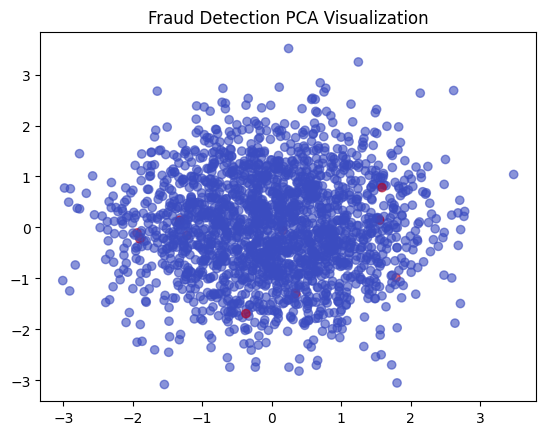

In [9]:
# 3. Fraud Detection in Financial Transactions
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import OneClassSVM
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

# Step 1: Load the Credit Card Fraud Dataset
# Replace with the actual dataset path when available
# df = pd.read_csv('path_to_creditcard.csv')

# Simulate dataset structure for demonstration
np.random.seed(42)

n_samples = 10000
df = pd.DataFrame({
    'V1': np.random.normal(0, 1, n_samples),
    'V2': np.random.normal(0, 1, n_samples),
    'V3': np.random.normal(0, 1, n_samples),
    # Add features up to V28 (similar to the dataset structure)
    'Amount': np.random.uniform(0, 250, n_samples),
    'Class': np.random.choice([0, 1], size=n_samples, p=[0.995, 0.005])  # Imbalanced: 0 = non-fraud, 1 = fraud
})

print("Simulated Dataset Head:")
print(df.head())

# Step 2: Preprocessing and Handling Class Imbalance
X = df.drop('Class', axis=1)
y = df['Class']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balancing the dataset using SMOTE (for training, not for anomaly detection models)
X_train_balanced, y_train_balanced = SMOTE().fit_resample(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Training the Models

# 1. Isolation Forest
iso_forest = IsolationForest(contamination=0.005, random_state=42)
iso_forest.fit(X_train)

# Predict anomalies (-1 for outliers, 1 for inliers)
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

# 2. One-Class SVM
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
svm.fit(X_train)

# Predict anomalies (-1 for outliers, 1 for inliers)
y_pred_svm = svm.predict(X_test)
y_pred_svm = np.where(y_pred_svm == -1, 1, 0)

# 3. Autoencoder Model
autoencoder = Sequential([
    Dense(15, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(2, activation='relu'),
    Dense(10, activation='relu'),
    Dense(15, activation='relu'),
    Dense(X_train.shape[1], activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Use the reconstruction error to identify fraud
X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)
threshold = np.percentile(mse, 95)  # Set threshold for anomaly detection
y_pred_auto = np.where(mse > threshold, 1, 0)

# Step 4: Evaluating the Models
# Classification Report for each model
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("\n")

evaluate_model(y_test, y_pred_iso, "Isolation Forest")
evaluate_model(y_test, y_pred_svm, "One-Class SVM")
evaluate_model(y_test, y_pred_auto, "Autoencoder")

# Step 5: Interpretability and Feedback Loop
# Using PCA to visualize fraud vs non-fraud transactions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test, cmap='coolwarm', alpha=0.6, label='True')
plt.title('Fraud Detection PCA Visualization')
plt.show()

# Feedback loop:
# In a real-time system, you would update the model periodically using feedback from fraud analysts
# based on new fraud patterns or false positive/negative cases.


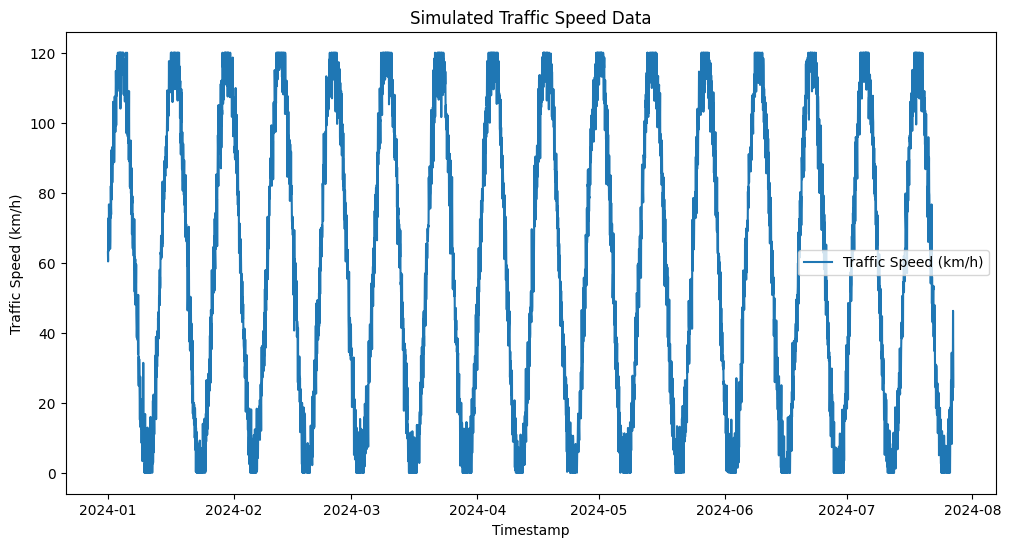

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 175ms/step - loss: 0.0656 - val_loss: 0.0031
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 28s 303ms/step - loss: 0.0051 - val_loss: 0.0029
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - loss: 0.0048 - val_loss: 0.0028
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 191ms/step - loss: 0.0045 - val_loss: 0.0029
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 201ms/step - loss: 0.0042 - val_loss: 0.0029
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - loss: 0.0045 - val_loss: 0.0034
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - loss: 0.0049 - val_loss: 0.0031
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 17s 279ms/step - loss: 0.0044 - val_loss: 0.0028
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 318ms/step - loss: 0.0041 - val_loss: 0.0028
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - loss: 0.0045 - val_loss: 0.0027
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 203ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/ste

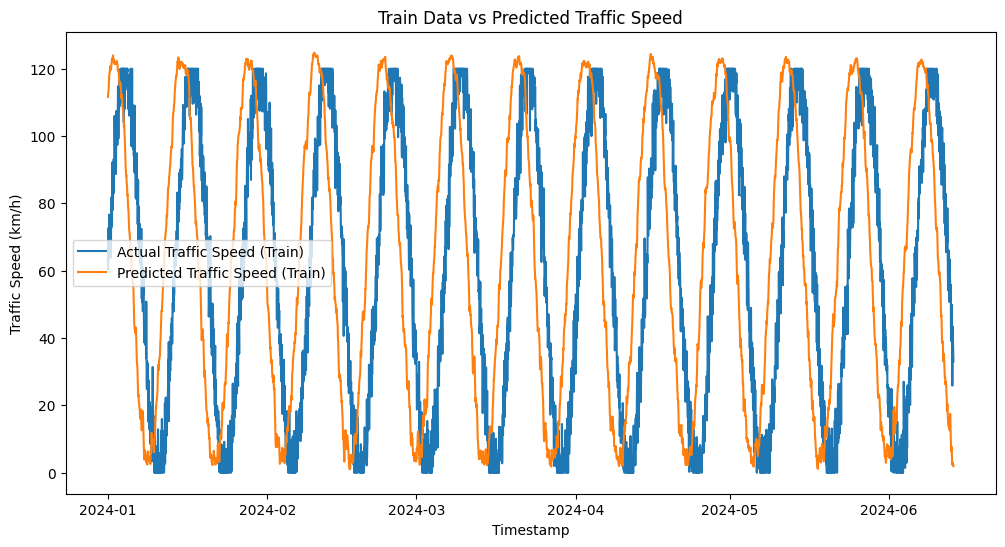

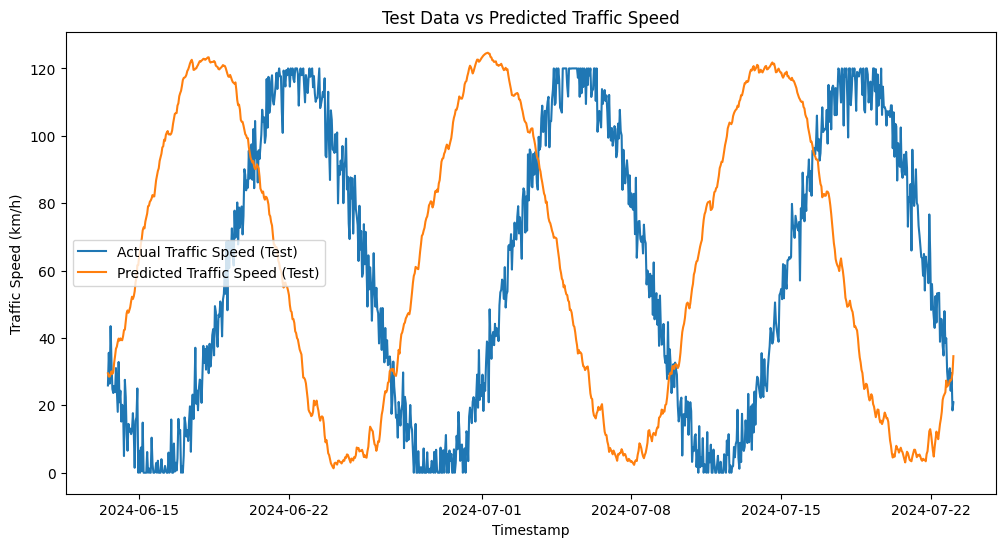

124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0034
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0033
Train Loss: 0.0034, Test Loss: 0.0033


In [12]:
# 4. Real-Time Traffic Prediction and Management
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, GRU, Dropout
from sklearn.model_selection import train_test_split

# Simulated data for demonstration (replace this with the actual METR-LA dataset)
# In reality, METR-LA consists of time-series sensor data on traffic speed.

# Generating random traffic sensor data
np.random.seed(42)
time = pd.date_range('2024-01-01', periods=5000, freq='H')
traffic_data = np.sin(np.linspace(0, 100, 5000)) + np.random.normal(0, 0.1, 5000)
traffic_speeds = np.clip(traffic_data * 60 + 60, 0, 120)  # Random traffic speeds between 0-120 km/h

df = pd.DataFrame({'timestamp': time, 'traffic_speed': traffic_speeds})
df.set_index('timestamp', inplace=True)

# Visualizing the random traffic speed data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['traffic_speed'], label="Traffic Speed (km/h)")
plt.title('Simulated Traffic Speed Data')
plt.xlabel('Timestamp')
plt.ylabel('Traffic Speed (km/h)')
plt.legend()
plt.show()

# Preprocessing the data
scaler = MinMaxScaler()
df['traffic_speed_scaled'] = scaler.fit_transform(df[['traffic_speed']])

# Prepare data for LSTM/GRU model
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Convert the traffic speed data to a NumPy array and split into train/test sets
traffic_data = df['traffic_speed_scaled'].values.reshape(-1, 1)
train_size = int(len(traffic_data) * 0.8)
test_size = len(traffic_data) - train_size
train_data, test_data = traffic_data[0:train_size, :], traffic_data[train_size:len(traffic_data), :]

# Create dataset with time steps (sliding window)
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] for LSTM/GRU
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM/GRU model
model = Sequential()
model.add(GRU(100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# Predict traffic speeds
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert scaling to get actual traffic speeds
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plot training data vs predicted
plt.figure(figsize=(12, 6))
plt.plot(df.index[:len(train_predict)], df['traffic_speed'][:len(train_predict)], label="Actual Traffic Speed (Train)")
plt.plot(df.index[:len(train_predict)], train_predict.flatten(), label="Predicted Traffic Speed (Train)")
plt.title("Train Data vs Predicted Traffic Speed")
plt.xlabel("Timestamp")
plt.ylabel("Traffic Speed (km/h)")
plt.legend()
plt.show()

# Plot test data vs predicted
plt.figure(figsize=(12, 6))
plt.plot(df.index[len(train_predict):(len(train_predict) + len(test_predict))], df['traffic_speed'][len(train_predict):(len(train_predict) + len(test_predict))], label="Actual Traffic Speed (Test)")
plt.plot(df.index[len(train_predict):(len(train_predict) + len(test_predict))], test_predict.flatten(), label="Predicted Traffic Speed (Test)")
plt.title("Test Data vs Predicted Traffic Speed")
plt.xlabel("Timestamp")
plt.ylabel("Traffic Speed (km/h)")
plt.legend()
plt.show()

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print(f"Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")


              precision    recall  f1-score   support

           0       0.53      0.53      0.53       103
           1       0.51      0.51      0.51        97

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200



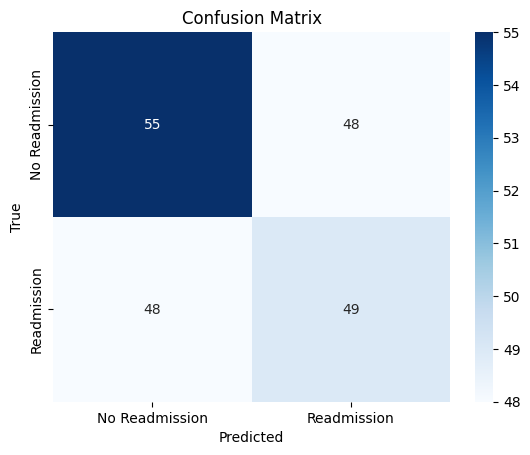

 99%|===================| 396/400 [00:14<00:00]       

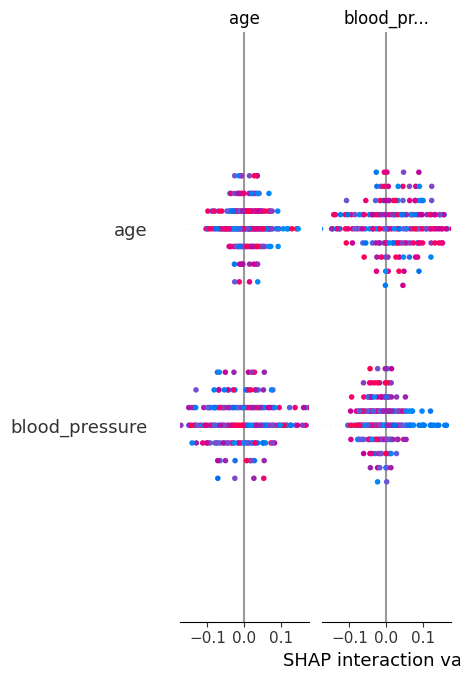

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

In [50]:
#5 Healthcare Outcome Prediction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated dataset creation
np.random.seed(42)

# Generate synthetic healthcare data
data = {
    'age': np.random.randint(20, 80, 1000),
    'blood_pressure': np.random.randint(80, 180, 1000),
    'cholesterol': np.random.randint(150, 300, 1000),
    'diabetes': np.random.randint(0, 2, 1000),
    'smoking_status': np.random.randint(0, 2, 1000),
    'body_mass_index': np.random.uniform(18.5, 40.0, 1000),
    'outcome': np.random.randint(0, 2, 1000)
}

df = pd.DataFrame(data)

# Data Preprocessing
df.loc[df.sample(frac=0.1).index, 'blood_pressure'] = np.nan
df.fillna(df.mean(), inplace=True)

X = df[['age', 'blood_pressure', 'cholesterol', 'diabetes', 'smoking_status', 'body_mass_index']]
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Readmission', 'Readmission'], yticklabels=['No Readmission', 'Readmission'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Initialize SHAP Explainer
explainer = shap.Explainer(rf_model, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Individual SHAP value visualization for the first test sample
shap.initjs()
shap.plots.force(shap_values[0], matplotlib=True)  # Specify matplotlib=True for compatibility


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-40-2f79c47d7399>:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top Association Rules:
                                         antecedents  \
0                   (CREAM CUPID HEARTS COAT HANGER)   
1               (WHITE HANGING HEART T-LIGHT HOLDER)   
2  (WHITE METAL LANTERN, CREAM CUPID HEARTS COAT ...   
3  (WHITE METAL LANTERN, WHITE HANGING HEART T-LI...   
4                   (CREAM CUPID HEARTS COAT HANGER)   
5               (WHITE HANGING HEART T-LIGHT HOLDER)   

                                         consequents   support  confidence  \
0               (WHITE HANGING HEART T-LIGHT HOLDER)  0.666667         1.0   
1                   (CREAM CUPID HEARTS COAT HANGER)  0.666667         1.0   
2               (WHITE HANGING HEART T-LIGHT HOLDER)  0.333333         1.0   
3                   (CREAM CUPID HEARTS COAT HANGER)  0.333333         1.0   
4  (WHITE METAL LANTERN, WHITE HANGING HEART T-LI...  0.333333         0.5   
5  (WHITE METAL LANTERN, CREAM CUPID HEARTS COAT ...  0.333333         0.5   

   lift  
0   1.5  
1   1.5  
2   1.5

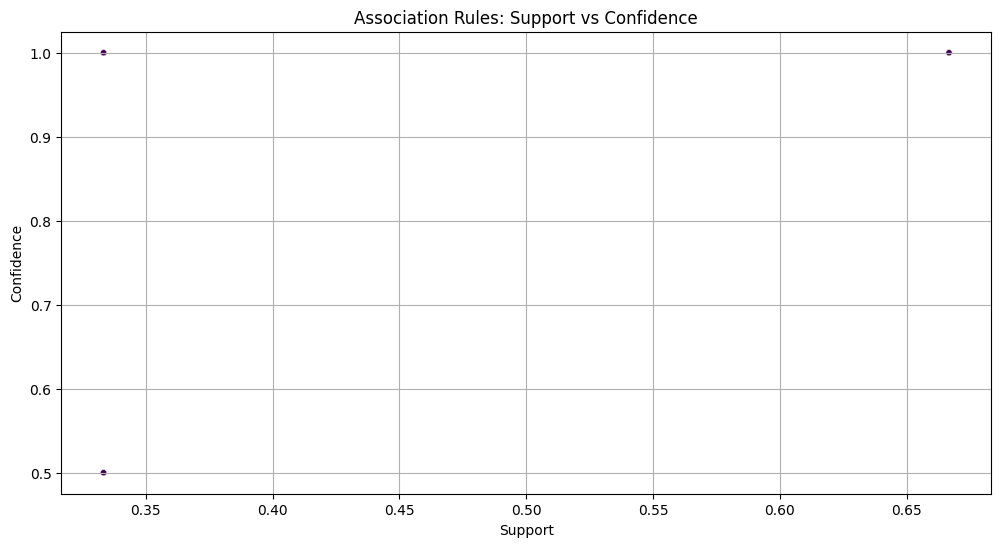

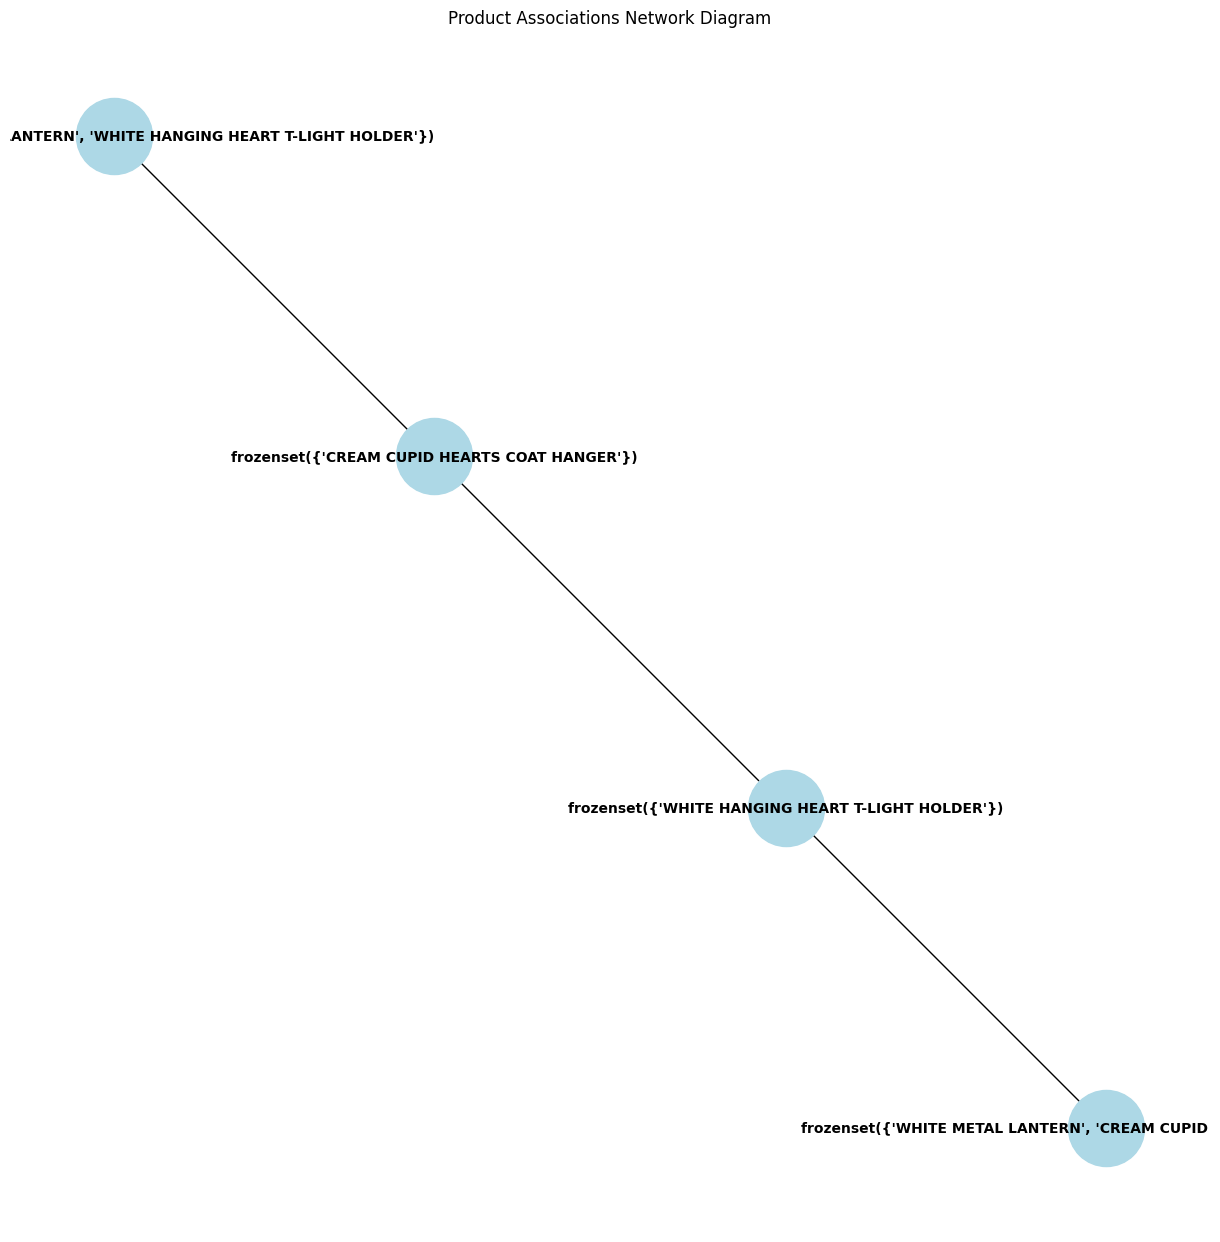


Recommendations for 'WHITE HANGING HEART T-LIGHT HOLDER':
No recommendations found.


In [40]:
#6 . Market Basket Analysis for Retailers
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Sample data resembling the Online Retail dataset
data = {
    'InvoiceNo': ['536365', '536365', '536365', '536366', '536366', '536367'],
    'StockCode': ['85123A', '71053', '84406B', '85123A', '84406B', '71053'],
    'Description': [
        'WHITE HANGING HEART T-LIGHT HOLDER',
        'WHITE METAL LANTERN',
        'CREAM CUPID HEARTS COAT HANGER',
        'WHITE HANGING HEART T-LIGHT HOLDER',
        'CREAM CUPID HEARTS COAT HANGER',
        'WHITE METAL LANTERN'
    ],
    'Quantity': [6, 6, 8, 6, 4, 2],
    'InvoiceDate': [
        '2010-12-01 08:26:00',
        '2010-12-01 08:26:00',
        '2010-12-01 08:26:00',
        '2010-12-01 08:28:00',
        '2010-12-01 08:28:00',
        '2010-12-01 08:34:00'
    ],
    'UnitPrice': [2.55, 3.39, 2.75, 2.55, 2.75, 3.39],
    'CustomerID': [17850, 17850, 17850, 17851, 17851, 17852],
}

# Creating DataFrame
df = pd.DataFrame(data)

# Data Preprocessing
# Drop rows with missing values in 'InvoiceNo' and 'Description'
df.dropna(subset=['InvoiceNo', 'Description'], inplace=True)

# Filter out cancelled orders (if any)
df = df[~df['InvoiceNo'].str.startswith('C')]

# Create a basket matrix
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Encode the basket matrix
basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)

# Perform Apriori algorithm
frequent_itemsets = apriori(basket_encoded, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the top rules
print("Top Association Rules:")
rules_sorted = rules.sort_values('lift', ascending=False)
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Visualization of the relationships
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rules_sorted, x='support', y='confidence', size='lift', sizes=(20, 300), hue='lift', legend='brief', palette='viridis')
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid()
plt.show()

# Create a network diagram for product associations
plt.figure(figsize=(12, 12))
G = nx.from_pandas_edgelist(rules_sorted, source='antecedents', target='consequents', edge_attr='lift')
pos = nx.spring_layout(G, seed=42)  # Set seed for reproducible layout
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
plt.title('Product Associations Network Diagram')
plt.show()

# Recommendation engine function
def recommend_products(product, rules):
    recommendations = rules[rules['antecedents'].apply(lambda x: product in x)]
    return recommendations

# Example of using the recommendation engine
product_to_recommend = frozenset(['WHITE HANGING HEART T-LIGHT HOLDER'])  # Use frozenset for matching
recommended_rules = recommend_products(product_to_recommend, rules_sorted)

print(f"\nRecommendations for '{list(product_to_recommend)[0]}':")
if not recommended_rules.empty:
    for index, row in recommended_rules.iterrows():
        print(f" - {list(row['consequents'])} (Lift: {row['lift']:.2f})")
else:
    print("No recommendations found.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Mean Squared Error: 2.64


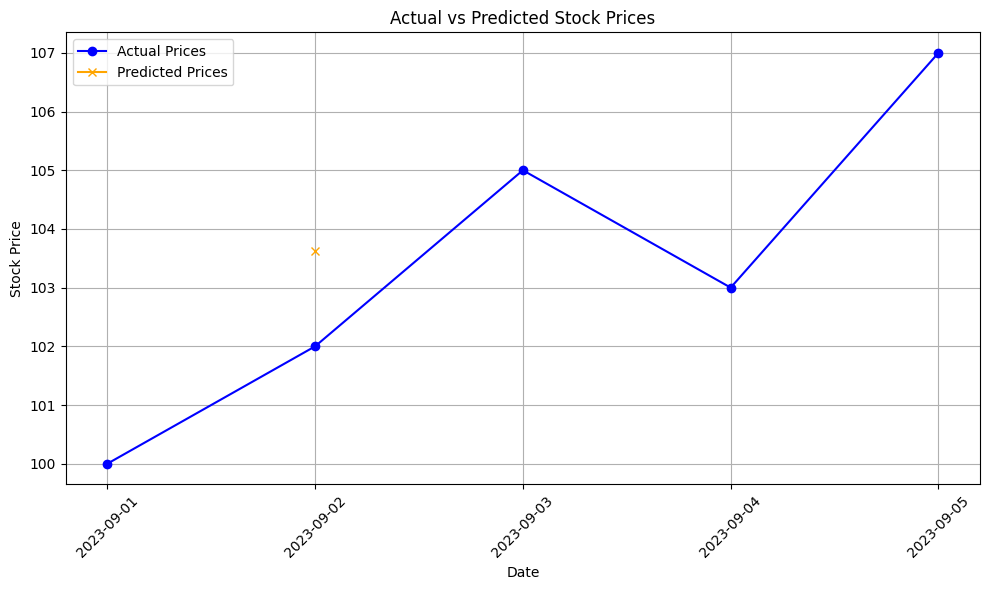

In [42]:
# 7 . Predicting Stock Prices Using Sentiment Analysis
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Sample financial news data
news_data = {
    'date': ['2023-09-01', '2023-09-02', '2023-09-03', '2023-09-04', '2023-09-05'],
    'news': [
        'Company A reports record earnings and optimistic future outlook.',
        'Market reacts negatively to rising inflation concerns.',
        'Company B announces a merger with Company C.',
        'Analysts predict downturn in the tech sector.',
        'Positive reviews for Company D\'s new product launch.'
    ]
}

# Sample historical stock price data
stock_data = {
    'date': ['2023-09-01', '2023-09-02', '2023-09-03', '2023-09-04', '2023-09-05'],
    'stock_price': [100, 102, 105, 103, 107]
}

# Creating DataFrames
news_df = pd.DataFrame(news_data)
stock_df = pd.DataFrame(stock_data)

# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
def compute_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  # Use the compound score

news_df['sentiment'] = news_df['news'].apply(compute_sentiment)

# Merge sentiment scores with historical stock data
merged_df = pd.merge(stock_df, news_df[['date', 'sentiment']], on='date', how='inner')

# Prepare data for modeling
X = merged_df[['sentiment']]  # Features
y = merged_df['stock_price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the predictive model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Plotting actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(merged_df['date'], merged_df['stock_price'], label='Actual Prices', marker='o', color='blue')
plt.plot(merged_df.loc[X_test.index, 'date'], y_pred, label='Predicted Prices', marker='x', color='orange')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [46]:
# 8  Building a Recommender System
!pip install pandas scikit-surprise

import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Sample MovieLens ratings data
data = {
    'userId': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4],
    'movieId': [101, 102, 103, 101, 104, 102, 105, 106, 103, 104],
    'rating': [5, 4, 3, 2, 5, 5, 3, 4, 4, 2]
}

# Create DataFrame
ratings_df = pd.DataFrame(data)

# Display the DataFrame
print("Sample Ratings Data:")
print(ratings_df)

# Prepare the data for Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build the SVD model
model = SVD()
model.fit(trainset)

# Make predictions
predictions = model.test(testset)

# Compute RMSE
rmse = accuracy.rmse(predictions)
print(f'Root Mean Square Error: {rmse:.2f}')

# Function to get top N recommendations
def get_top_n_recommendations(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if not uid in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Get top 10 recommendations for each user
top_n_recommendations = get_top_n_recommendations(predictions, n=10)

# Display recommendations
print("\nTop N Recommendations:")
for user_id, recs in top_n_recommendations.items():
    print(f"User {user_id}: {[f'Movie {iid} (Estimated rating: {est:.2f})' for (iid, est) in recs]}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357280 sha256=7e0ebfa564ad9eaa09ea5eb4156e235b80f0676a9f293ed51809afcc44966e44
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise
Sample Ratings Data:
   userId  movieId  rating
0       1      101       5
1       1      102       4
2       1      103       3
3       2      101       2
4       2      104       5
5       3      102       5
6       3      105       3
7       3      106       4
8       4      103       4
9       4      104       2
RMSE: 1.5682
Root Mean Square Error: 1.57

Top N Recommendations:
User 2: ['Movie 101 (Estimated rating: 3.95)']
User 3: ['Movie 105 (Estimated rating: 4.07)']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Root Mean Square Error: 1.12


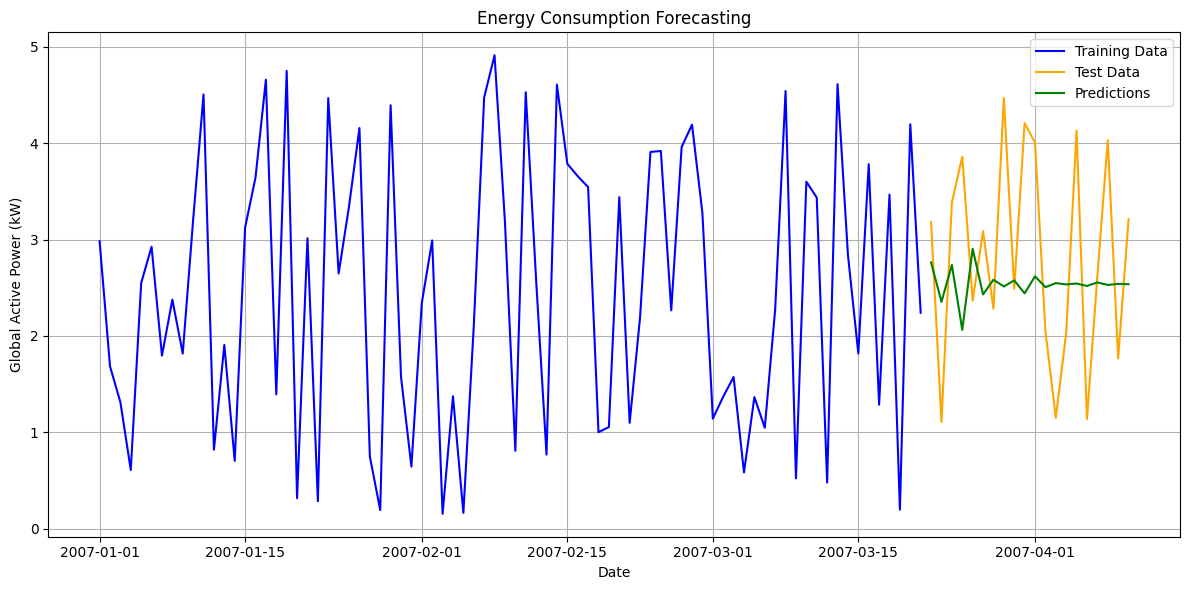

In [47]:
# 9 Energy Consumption Forecasting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Load the Household Power Consumption dataset
# Replace the path with your actual CSV file path
# For this example, we will simulate data since we can't fetch from a URL directly
data = {
    'Date': pd.date_range(start='2007-01-01', periods=100, freq='D'),
    'Global_active_power': np.random.rand(100) * 5  # Simulated random power consumption values
}

# Create DataFrame
power_df = pd.DataFrame(data)

# Set the date as index
power_df.set_index('Date', inplace=True)

# Check for missing values and handle them
power_df.fillna(method='ffill', inplace=True)

# Split the dataset into training and testing sets
train_size = int(len(power_df) * 0.8)
train, test = power_df[:train_size], power_df[train_size:]

# Train the ARIMA model (adjust p, d, q values as necessary)
model = ARIMA(train['Global_active_power'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))
test['Predictions'] = predictions.values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Global_active_power'], test['Predictions']))
print(f'Root Mean Square Error: {rmse:.2f}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Global_active_power'], label='Training Data', color='blue')
plt.plot(test.index, test['Global_active_power'], label='Test Data', color='orange')
plt.plot(test.index, test['Predictions'], label='Predictions', color='green')
plt.title('Energy Consumption Forecasting')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Dataset Preview:
         RM      LSTAT   PTRATIO     INDUS  TAX          price
0  2.456316  19.418094  7.969475  8.030756  207  360293.209685
1  1.092794   7.472113  5.904261  4.318051  608  382881.660524
2  7.943842  13.629212  0.969173  7.858085  623   45741.478965
3  0.989686   1.270714  5.480215  4.624568  231  256937.917389
4  2.713814   7.924947  7.027383  9.409658  671  115791.495644

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       100 non-null    float64
 1   LSTAT    100 non-null    float64
 2   PTRATIO  100 non-null    float64
 3   INDUS    100 non-null    float64
 4   TAX      100 non-null    int64  
 5   price    100 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 4.8 KB
None


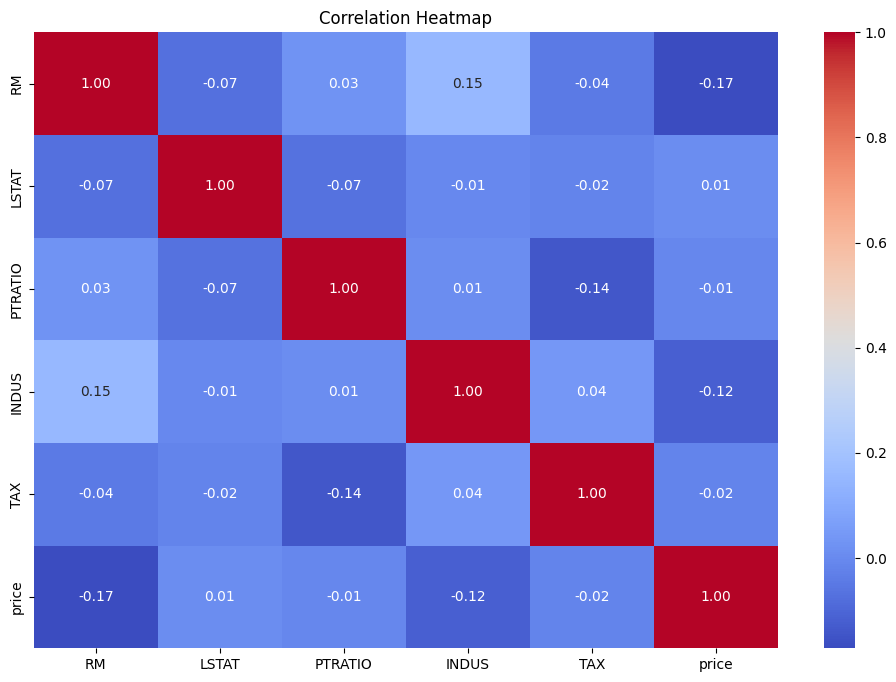


Root Mean Square Error: 154023.88
R-squared: -0.07


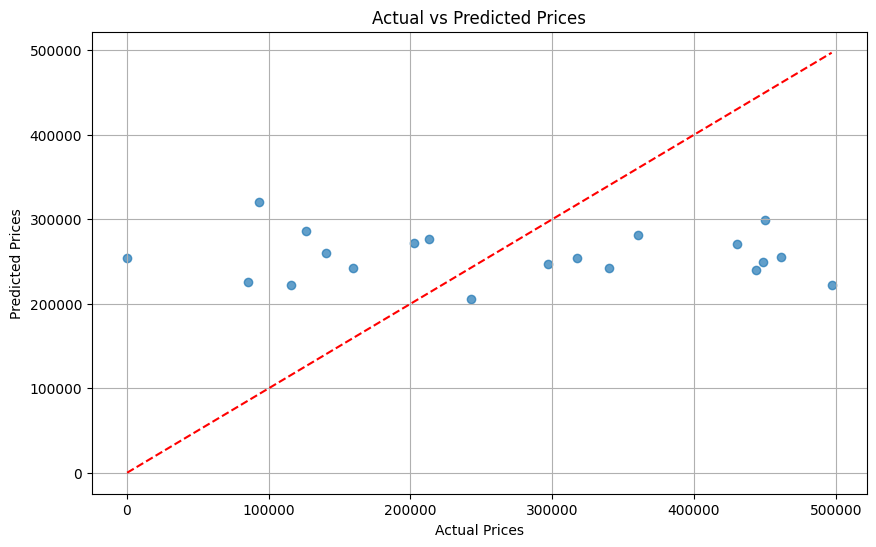

In [49]:
# 10 . Predicting Real Estate Prices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Simulating a dataset similar to the House Prices dataset
data = {
    'RM': np.random.rand(100) * 10,      # Average number of rooms
    'LSTAT': np.random.rand(100) * 20,    # Percentage of lower status of the population
    'PTRATIO': np.random.rand(100) * 10,  # Pupil-teacher ratio
    'INDUS': np.random.rand(100) * 10,    # Proportion of non-retail business acres per town
    'TAX': np.random.randint(200, 700, 100),  # Full-value property tax rate per $10,000
    'price': np.random.rand(100) * 500000  # Simulated house prices
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Explore the dataset
print("\nDataset Info:")
print(df.info())

# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering: Select relevant features
features = ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX']
X = df[features]
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'\nRoot Mean Square Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid()
plt.show()
